In [1]:
import vipy
import torch
import numpy as np
from keynet.system import PermutationKeynet
from keynet.mnist import LeNet_AvgPool

In [2]:
# Randomly initialize a lenet torch network 
net = LeNet_AvgPool()
inshape = (1,28,28)

In [3]:
# Create a (sensor, model) pair for a keyed sensor and keynet
(sensor, knet) = PermutationKeynet(inshape, net, do_output_encryption=False)

[keynet.layers.KeyNet]: Keying "conv1"
[keynet.layers.KeyNet]: Keying "relu1"
[KeyedLayer]: sparse_toeplitz_conv2d=1.8 seconds
[KeyedLayer]: conv2d dot=0.0 seconds
[keynet.layers.KeyNet]:     KeyedLayer(<Conv2d: in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, backend=scipy, shape=(4705, 785), nnz=45049>>)
[keynet.layers.KeyNet]:     ReLU()
[keynet.layers.KeyNet]: Keying "pool1"
[KeyedLayer]: sparse_toeplitz_conv2d=0.0 seconds
[KeyedLayer]: avgpool2d dot=0.0 seconds
[keynet.layers.KeyNet]:     KeyedLayer(<AvgPool2d: kernel_size=3, stride=2, backend=scipy, shape=(1177, 4705), nnz=10087>>)
[keynet.layers.KeyNet]: Keying "conv2"
[keynet.layers.KeyNet]: Keying "relu2"
[KeyedLayer]: sparse_toeplitz_conv2d=0.0 seconds
[KeyedLayer]: conv2d dot=0.0 seconds
[keynet.layers.KeyNet]:     KeyedLayer(<Conv2d: in_channels=6, out_channels=16, kernel_size=(3, 3), stride=1, backend=scipy, shape=(3137, 1177), nnz=156737>>)
[keynet.layers.KeyNet]:     ReLU()
[keynet.layers.KeyNet]: Keying "poo

In [4]:
# Load an example image as a torch tensor and encode with the lenet
x_plain = sensor.load('owl.jpg').tensor()
y = net.forward(x_plain).detach().numpy().flatten()

# Load the same image as an encrypted torch tensor and encode with the keynet
x_cipher = sensor.load('owl.jpg').encrypt().tensor()
yh = knet.forward(x_cipher).detach().numpy().flatten()

# The output of the keynet is identical to the output of the source network
assert np.allclose(y, yh, atol=1E-5)

[keynet.layer]: forward <KeyedSensor: height=28, width=28, channels=1>
[keynet.layer]: forward KeyedLayer(<Conv2d: in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, backend=scipy, shape=(4705, 785), nnz=45049>>)
[keynet.layer]: forward KeyedLayer(<AvgPool2d: kernel_size=3, stride=2, backend=scipy, shape=(1177, 4705), nnz=10087>>)
[keynet.layer]: forward KeyedLayer(<Conv2d: in_channels=6, out_channels=16, kernel_size=(3, 3), stride=1, backend=scipy, shape=(3137, 1177), nnz=156737>>)
[keynet.layer]: forward KeyedLayer(<AvgPool2d: kernel_size=3, stride=2, backend=scipy, shape=(785, 3137), nnz=6401>>)
[keynet.layer]: forward KeyedLayer(<Linear: in_features=784, out_features=120, backend=scipy, shape=(121, 785), nnz=94201>>)
[keynet.layer]: forward KeyedLayer(<Linear: in_features=120, out_features=84, backend=scipy, shape=(85, 121), nnz=10165>>)
[keynet.layer]: forward KeyedLayer(<Linear: in_features=84, out_features=10, backend=scipy, shape=(11, 85), nnz=851>>)


In [5]:
# Create another (sensor, model) pair
(another_sensor, another_keynet) = PermutationKeynet(inshape, net, do_output_encryption=False)

# The keyed image cannot be applied to any other keynet
yh_another = another_keynet.forward(x_cipher).detach().numpy().flatten()
assert not np.allclose(yh, yh_another, atol=1E-5)

[keynet.layers.KeyNet]: Keying "conv1"
[keynet.layers.KeyNet]: Keying "relu1"
[KeyedLayer]: sparse_toeplitz_conv2d=0.0 seconds
[KeyedLayer]: conv2d dot=0.0 seconds
[keynet.layers.KeyNet]:     KeyedLayer(<Conv2d: in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, backend=scipy, shape=(4705, 785), nnz=45049>>)
[keynet.layers.KeyNet]:     ReLU()
[keynet.layers.KeyNet]: Keying "pool1"
[KeyedLayer]: sparse_toeplitz_conv2d=0.0 seconds
[KeyedLayer]: avgpool2d dot=0.0 seconds
[keynet.layers.KeyNet]:     KeyedLayer(<AvgPool2d: kernel_size=3, stride=2, backend=scipy, shape=(1177, 4705), nnz=10087>>)
[keynet.layers.KeyNet]: Keying "conv2"
[keynet.layers.KeyNet]: Keying "relu2"
[KeyedLayer]: sparse_toeplitz_conv2d=0.0 seconds
[KeyedLayer]: conv2d dot=0.0 seconds
[keynet.layers.KeyNet]:     KeyedLayer(<Conv2d: in_channels=6, out_channels=16, kernel_size=(3, 3), stride=1, backend=scipy, shape=(3137, 1177), nnz=156737>>)
[keynet.layers.KeyNet]:     ReLU()
[keynet.layers.KeyNet]: Keying "poo

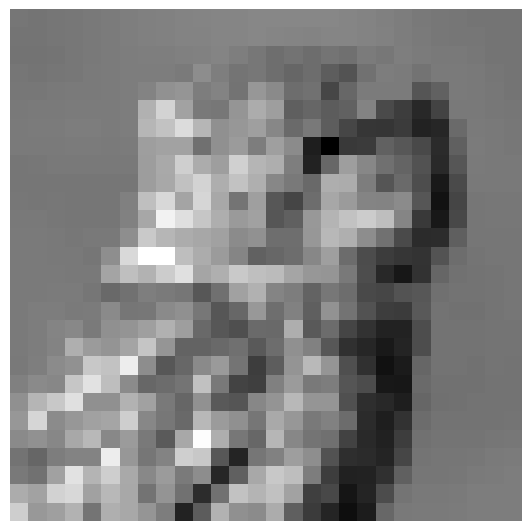

In [8]:
# This is the original image, resized to be (28x28), and input into the lenet network
im_plain = sensor.decrypt().asimage().resize(512, 512, interp='nearest').show()

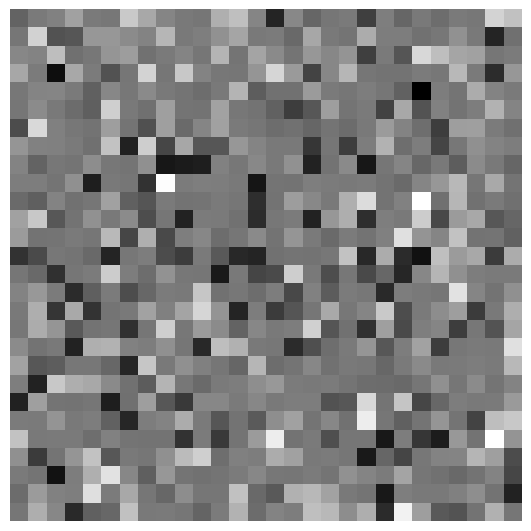

[keynet.layer]: forward <KeyedSensor: height=28, width=28, channels=1>


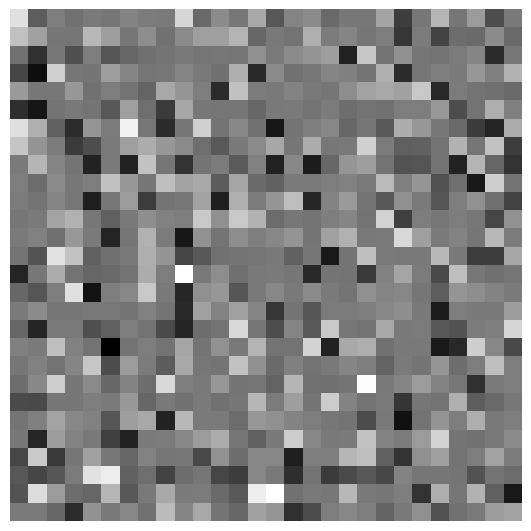

In [10]:
# These are the keyed images, input to the keynet, which is unrecognizable to a human
im_cipher = sensor.encrypt().toimage().resize(512, 512, interp='nearest').show()
im_cipher = another_sensor.load('owl.jpg').encrypt().toimage().resize(512, 512, interp='nearest').show()